In [138]:
import torch 

In [139]:
print(torch.__version__)
print(torch.cuda.is_available())

2.5.1
True


In [140]:
import torch.nn as nn 
from torch.optim import Adam 
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary 
from sklearn.model_selection import train_test_split

In [141]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [142]:
device = 'cuda' if torch.cuda.is_available else 'cpu' 

In [143]:
print(device)

cuda


In [144]:
data_df = pd.read_csv("riceClassification.csv")

In [145]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [146]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [147]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [148]:
print(data_df['Class'].unique())

[1 0]


In [149]:
original_df = data_df.copy()

for column in data_df.columns:
    data_df[column] = data_df[column]/data_df[column].abs().max()

In [150]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [151]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [153]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [154]:
X_train.shape

(12729, 10)

In [155]:
X_val.shape

(2728, 10)

In [156]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
        

In [157]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [158]:
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size=32, shuffle=True)

In [159]:
for x, y in train_dataloader:
    print(x)
    print("==============")
    print(y)
    break

tensor([[0.5690, 0.7492, 0.6636, 0.9484, 0.5447, 0.7544, 0.6381, 0.6304, 0.7853,
         0.6405],
        [0.5513, 0.8115, 0.5950, 0.9763, 0.5220, 0.7425, 0.5300, 0.6471, 0.7221,
         0.7738],
        [0.9184, 0.9198, 0.8769, 0.9341, 0.8709, 0.9583, 0.6946, 0.7820, 0.8236,
         0.5952],
        [0.8666, 0.8838, 0.8557, 0.9308, 0.8221, 0.9309, 0.6365, 0.7502, 0.8445,
         0.5860],
        [0.5636, 0.8141, 0.6054, 0.9746, 0.5378, 0.7507, 0.5590, 0.6530, 0.7248,
         0.7630],
        [0.6796, 0.7949, 0.7534, 0.9353, 0.6669, 0.8244, 0.6131, 0.6950, 0.7715,
         0.5986],
        [0.8462, 0.8350, 0.8799, 0.9103, 0.8038, 0.9199, 0.7285, 0.7331, 0.8636,
         0.5384],
        [0.5786, 0.8522, 0.5939, 0.9821, 0.5550, 0.7606, 0.7164, 0.6790, 0.6882,
         0.8141],
        [0.8093, 0.8571, 0.8226, 0.9326, 0.7712, 0.8996, 0.7348, 0.7304, 0.8319,
         0.5911],
        [0.5648, 0.8202, 0.6049, 0.9756, 0.5367, 0.7516, 0.5341, 0.6557, 0.7205,
         0.7693],
        [0

In [160]:
Hidden_Neurons = 10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.input_layer = nn.Linear(X.shape[1], Hidden_Neurons)
        self.linear =  nn.Linear(Hidden_Neurons, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x 
    

model = MyModel().to(device)

In [161]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [162]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr = 1e-3)

In [168]:
total_loss_train_plot = [] 
total_loss_valitdation_plot = [] 
total_accuracy_train_plot = []
total_acc_validation_plot = [] 

epochs = 10 
for epoch in range(epochs):
    total_acc_train = 0 
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0
    
    for data in train_dataloader:
        inputs, labels = data 
        
        prediction = model(inputs).squeeze(1)
    
        batch_loss = criterion(prediction, labels)
    
        total_loss_train += batch_loss.item() 
    
        acc = ((prediction).round() == labels).sum().item()
    
        total_acc_train += acc 
    
        batch_loss.backward() 
        optimizer.step()
        optimizer.zero_grad()
    
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data 
            prediction = model(inputs).squeeze(1)
            
            batch_loss = criterion(prediction, labels )
            
            total_loss_val += batch_loss.item()
            acc = ((prediction).round() == labels).sum().item()
            
            total_acc_val += acc 
        
        total_loss_train_plot.append(round(total_loss_train/1000, 4))
        total_loss_valitdation_plot.append(round(total_loss_val/1000, 4))
        total_accuracy_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
        total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))
        
        print(f'''Epoch no. {epoch+1}, Train Loss: {round(total_loss_train/1000, 4)}, Train Accuracy {round(total_acc_train/training_data.__len__() * 100, 4)}
              Validation Loss: {round(total_loss_val/1000, 4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100, 4)}''')
        
        print("*-"*25)
    
    
    
    

Epoch no. 1, Train Loss: 0.0171, Train Accuracy 98.633
              Validation Loss: 0.0048 Validation Accuracy: 98.607
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Epoch no. 2, Train Loss: 0.0167, Train Accuracy 98.6095
              Validation Loss: 0.0044 Validation Accuracy: 98.5704
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Epoch no. 3, Train Loss: 0.0163, Train Accuracy 98.7116
              Validation Loss: 0.0043 Validation Accuracy: 98.3871
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Epoch no. 4, Train Loss: 0.0162, Train Accuracy 98.6252
              Validation Loss: 0.0042 Validation Accuracy: 98.607
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Epoch no. 5, Train Loss: 0.0161, Train Accuracy 98.5938
              Validation Loss: 0.0044 Validation Accuracy: 98.5704
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Epoch no. 6, Train Loss: 0.0159, Train Accuracy 98.6566
              Validation Loss: 0.0043 Validation Accuracy: 98.4971
*-*-*-*-*-

In [169]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in testing_dataloader:
        inputs, label = data 
        
        prediction = model(inputs).squeeze(1)
        
        batch_loss_test = criterion(prediction, labels).item()
        
        total_loss_test += batch_loss_test 
        
        acc = ((prediction).round() == labels).sum().item()
        total_acc_test += acc 
        

print("Accuracy: ", round(total_acc_test/testing_data.__len__() * 100, 4))

ValueError: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([32])) is deprecated. Please ensure they have the same size.

Text(0, 0.5, 'Loss')

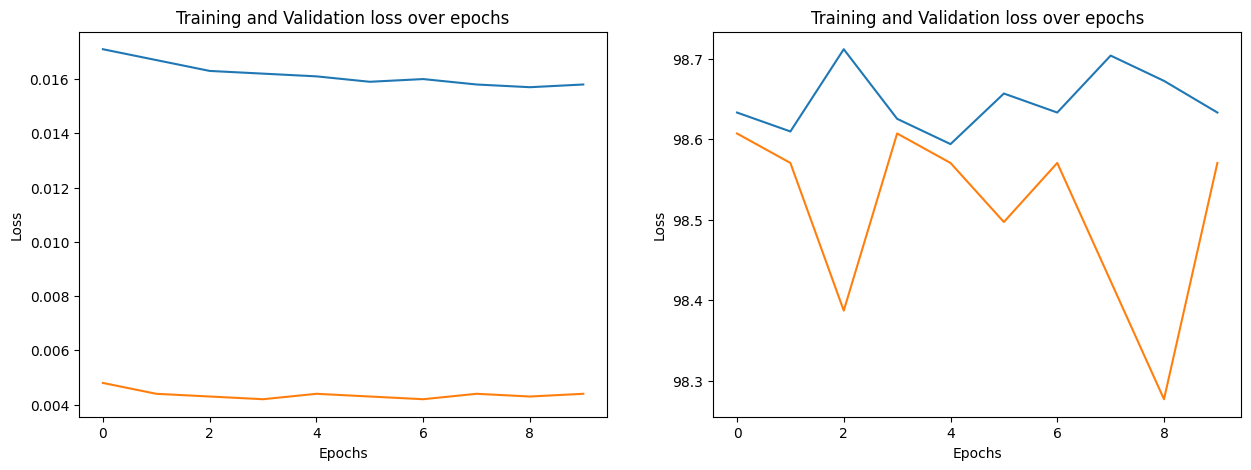

In [170]:
fig, axs = plt.subplots(nrows= 1, ncols=2, figsize = (15, 5))

axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_valitdation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation loss over epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

axs[1].plot(total_accuracy_train_plot, label = "Training Loss")
axs[1].plot(total_acc_validation_plot, label = "Validation Loss")
axs[1].set_title("Training and Validation loss over epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')

